In [5]:
import numpy as np
import pickle
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Path to your local CIFAR-100 folder
base_path = 'cifar-100-python'  

# Helper function to load CIFAR-100 batch (train/test)
def load_cifar100_batch(file_name):
    with open(os.path.join(base_path, file_name), 'rb') as file:
        data = pickle.load(file, encoding='latin1')
    return data['data'], data['fine_labels']

# Load the train and test data
x_train, y_train = load_cifar100_batch('train')
x_test, y_test = load_cifar100_batch('test')

In [7]:
# -------------------------------
# 1. PREPROCESSING
# -------------------------------

# Reshape and normalize images
x_train = x_train.reshape(-1, 3, 32, 32).transpose(0,2,3,1)  # (N, H, W, C)
x_test = x_test.reshape(-1, 3, 32, 32).transpose(0,2,3,1)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

# # convert labels to categorical
# y_train = to_categorical(y_train, 100)
# y_test = to_categorical(y_test, 100)


In [3]:
# -------------------------------
# 2. DATA AUGMENTATION
# -------------------------------
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(x_train)

In [4]:
# -------------------------------
# 3. MODEL DEFINITION
# -------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

def create_custom_cnn():
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Block 2
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Block 3
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    # Classification Head
    model.add(GlobalAveragePooling2D())
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='softmax'))  # CIFAR-100 has 100 classes

    return model

# Create the model
model = create_custom_cnn()
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 256)      │             

 Total params: 1,333,924 (5.09 MB)

 Trainable params: 1,331,108 (5.08 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [5]:
# -------------------------------
# 4. COMPILE
# -------------------------------
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',  # since labels are integers
    metrics=['accuracy']
)


In [6]:
# -------------------------------
# 5. CALLBACKS 
# -------------------------------
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

# Reduce LR on Plateau
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                 patience=10, 
                                 factor=0.5, 
                                 min_lr=1e-6, 
                                 verbose=1)

# Save the best model
checkpoint = ModelCheckpoint('best_model_final.keras', monitor='val_accuracy', 
                              save_best_only=True, mode='max', verbose=1)

# Early stopping
earlystop = EarlyStopping(monitor='val_accuracy', patience=30, verbose=1, restore_best_weights=True)



In [7]:
# -------------------------------
# 6. TRAINING
# -------------------------------
batch_size = 128
epochs = 200

history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_reduction, checkpoint, earlystop],
                    verbose=1)


Epoch 1/200


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.0565 - loss: 4.3892
Epoch 1: val_accuracy improved from -inf to 0.05920, saving model to best_model_final.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 212s 539ms/step - accuracy: 0.0565 - loss: 4.3884 - val_accuracy: 0.0592 - val_loss: 4.3939 - learning_rate: 0.0010
Epoch 2/200
  1/390 ━━━━━━━━━━━━━━━━━━━━ 3:35 555ms/step - accuracy: 0.1094 - loss: 3.6883

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.05920 to 0.06010, saving model to best_model_final.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.1094 - loss: 3.6883 - val_accuracy: 0.0601 - val_loss: 4.4004 - learning_rate: 0.0010
Epoch 3/200
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.1407 - loss: 3.5721
Epoch 3: val_accuracy improved from 0.06010 to 0.14090, saving model to best_model_final.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 252s 646ms/step - accuracy: 0.1408 - loss: 3.5718 - val_accuracy: 0.1409 - val_loss: 3.7506 - learning_rate: 0.0010
Epoch 4/200
  1/390 ━━━━━━━━━━━━━━━━━━━━ 3:40 568ms/step - accuracy: 0.2188 - loss: 3.1320
Epoch 4: val_accuracy improved from 0.14090 to 0.14440, saving model to best_model_final.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.2188 - loss: 3.1320 - val_accuracy: 0.1444 - val_loss: 3.7630 - learning_rate: 0.0010
Epoch 5/200
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.2132 - loss: 3.1434
Epoch 5: val_a

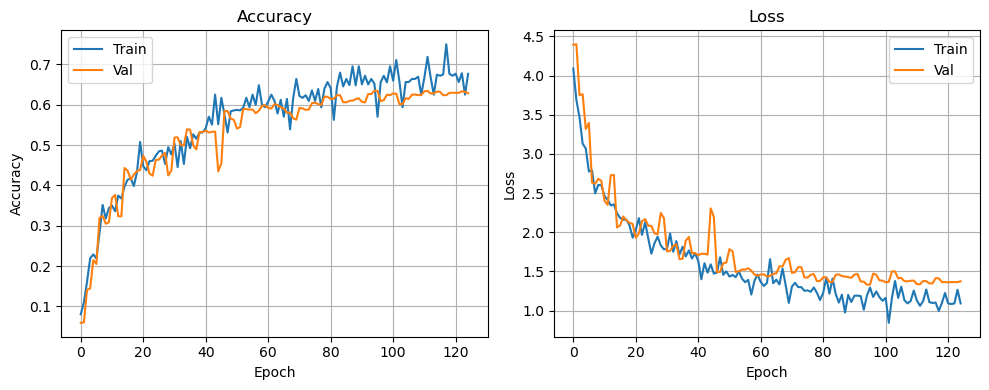

In [8]:
# === 8. Plot learning curves === #
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model
model = load_model("best_model_final.keras")

# Predict on test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # if model uses softmax activation

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Print overall F1, Precision, Recall (macro)
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))



313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.9000    0.8100    0.8526       100
           1     0.7579    0.7200    0.7385       100
           2     0.5618    0.5000    0.5291       100
           3     0.5556    0.3500    0.4294       100
           4     0.3789    0.3600    0.3692       100
           5     0.6774    0.6300    0.6528       100
           6     0.6364    0.8400    0.7241       100
           7     0.5625    0.7200    0.6316       100
           8     0.6930    0.7900    0.7383       100
           9     0.7841    0.6900    0.7340       100
          10     0.4356    0.4400    0.4378       100
          11     0.4343    0.4300    0.4322       100
          12     0.6320    0.7900    0.7022       100
          13     0.6184    0.4700    0.5341       100
          14     0.5273    0.5800    0.5524       100
          15     0.6809    0.6400    0.6598       100
          16  

In [17]:
# --- Load CIFAR-100 fine labels ---
with open('cifar-100-python/meta', 'rb') as f:
    label_data = pickle.load(f, encoding='latin1')
    fine_labels = label_data['fine_label_names']

# Ensure fine_labels only contains 100 classes
fine_labels = fine_labels[:100]  # In case it's 101 accidentally


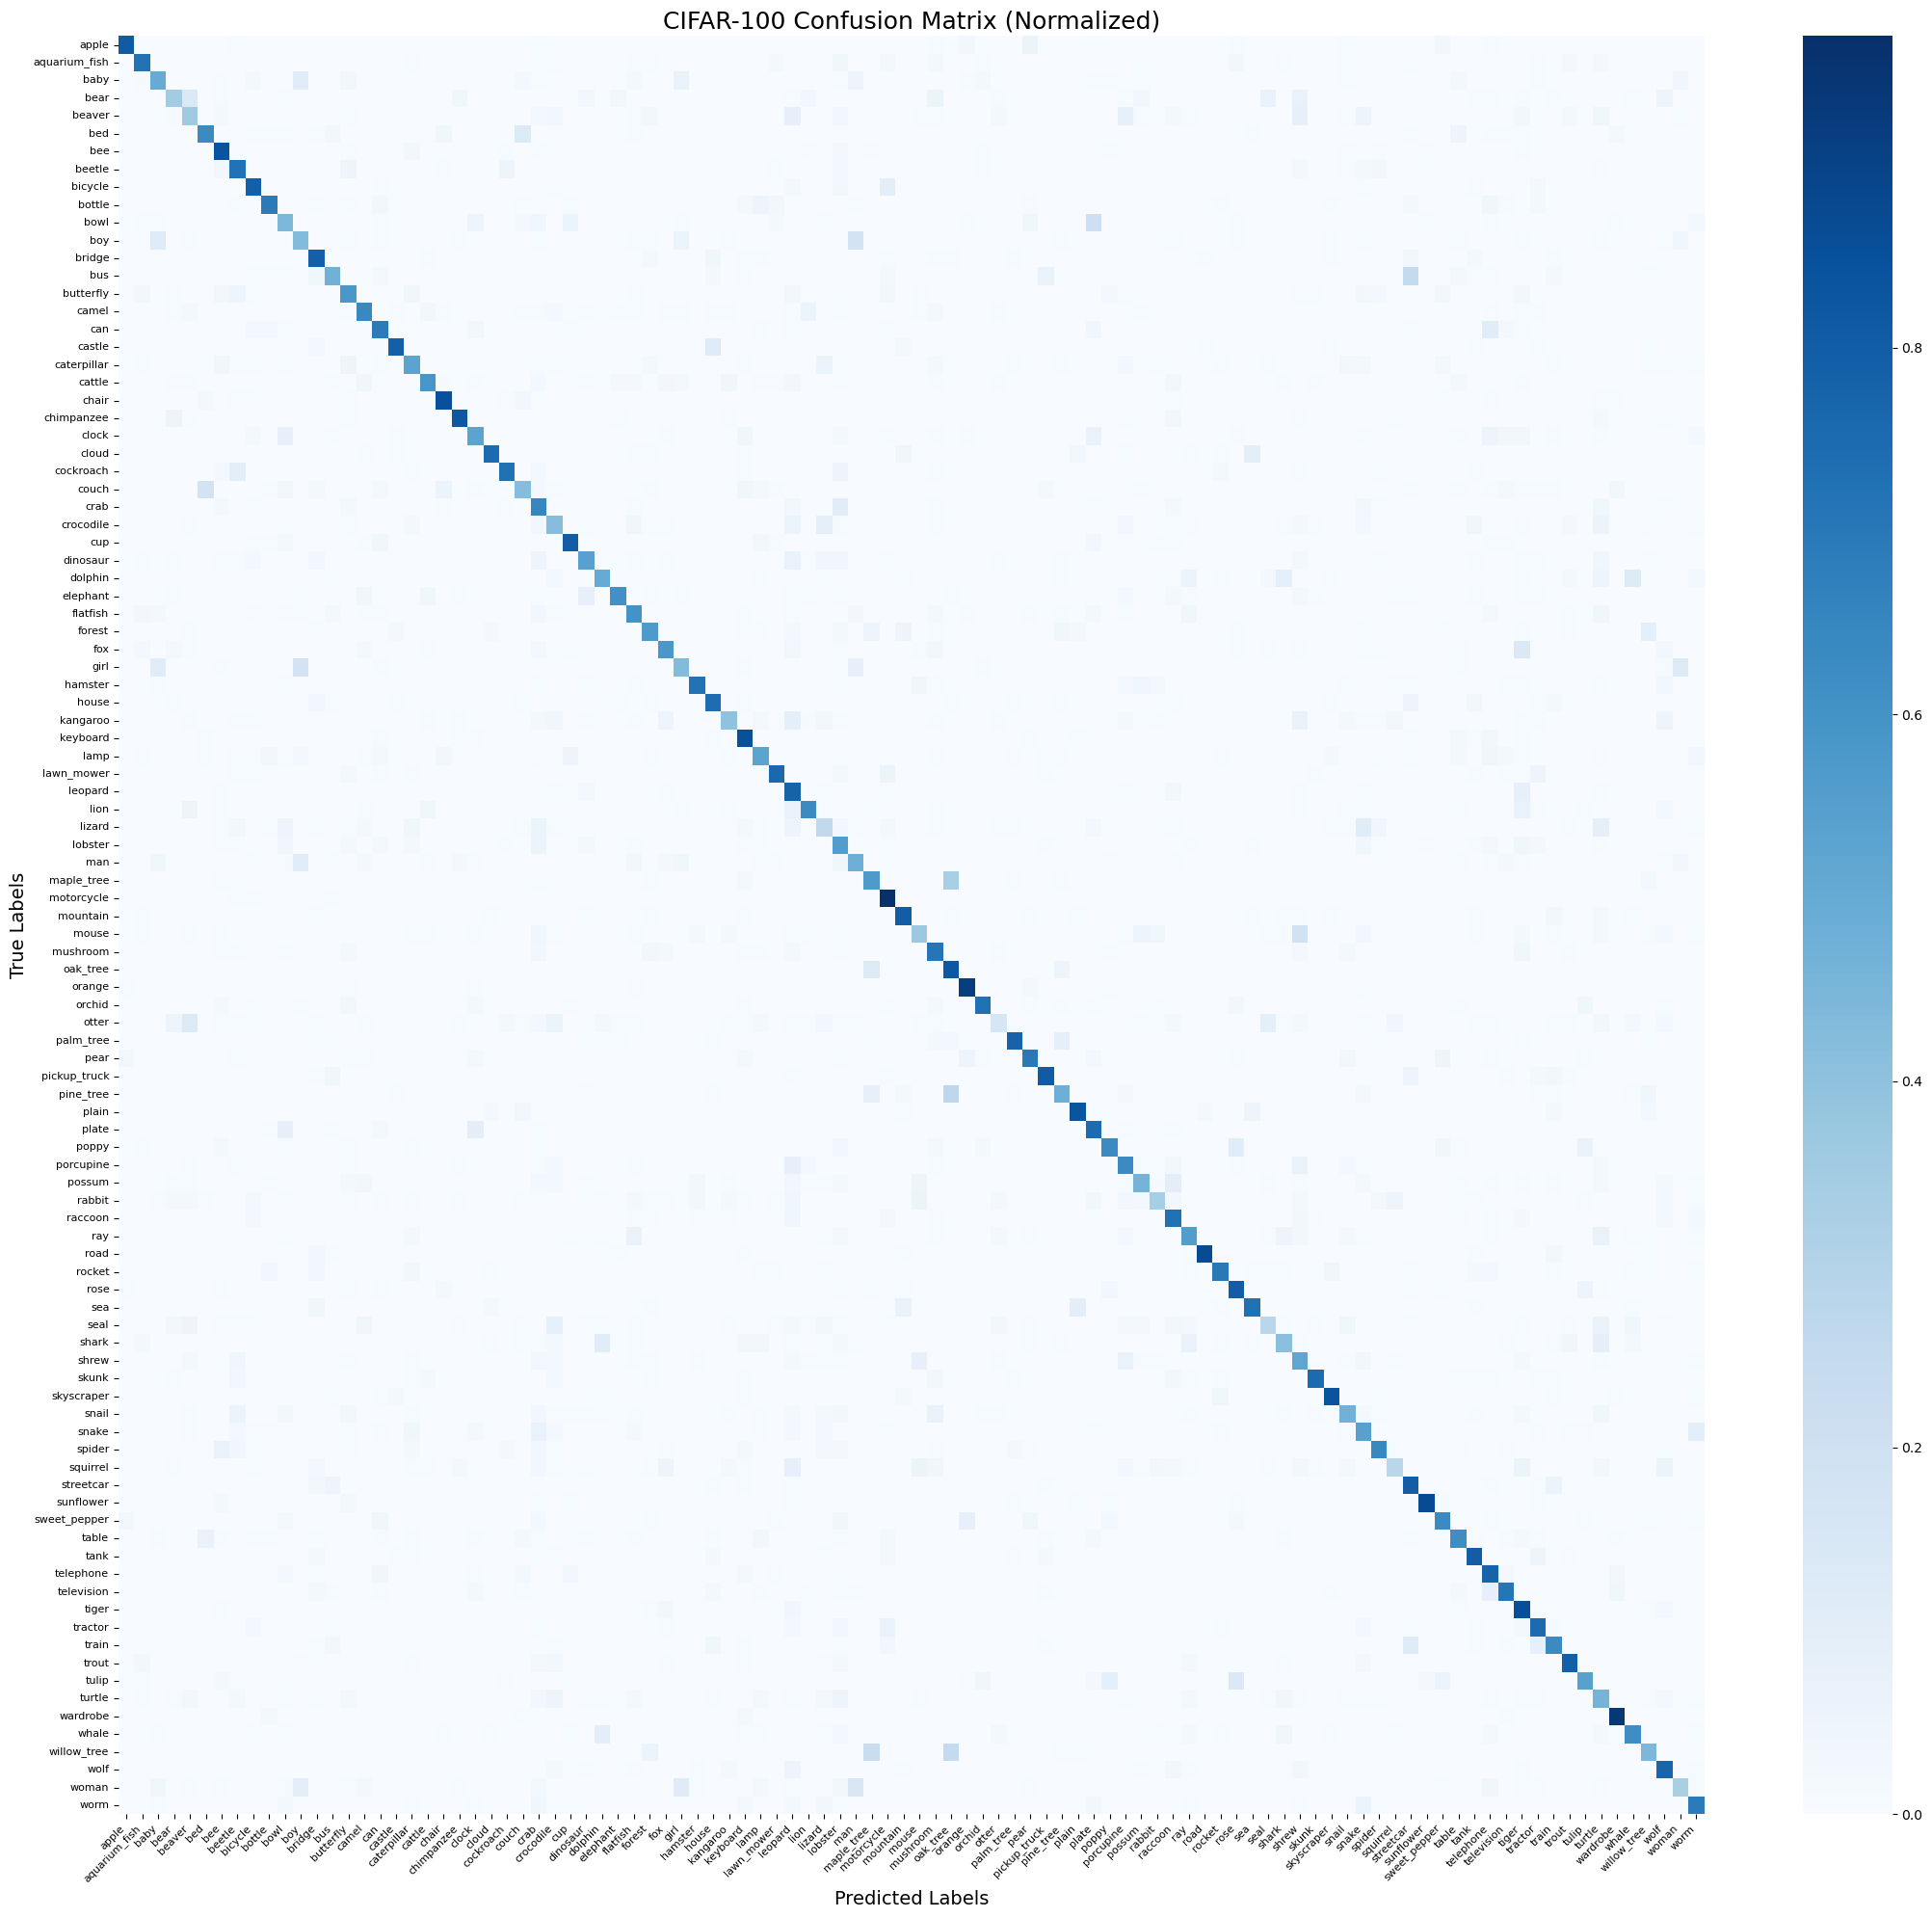

In [19]:
# Confusion matrix and heatmap
cm = confusion_matrix(y_test, y_pred, normalize='true')
cm_df = pd.DataFrame(cm, index=fine_labels, columns=fine_labels)

plt.figure(figsize=(22, 20))
sns.heatmap(cm_df, cmap='Blues', xticklabels=True, yticklabels=True)

plt.title("CIFAR-100 Confusion Matrix (Normalized)", fontsize=18)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()
